<a href="https://colab.research.google.com/github/AllaudinAli/Machine-Learning/blob/main/Problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

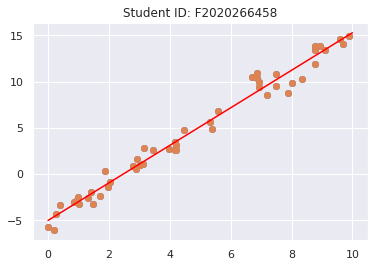

In [79]:
#Basis Linear Regression - Simple Linear Regression
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.title("Student ID: F2020266458")
plt.scatter(x, y)
plt.plot(xfit, yfit, color="Red");

In [80]:
print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:  2.0272088103606953
Model intercept: -4.998577085553204


In [81]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


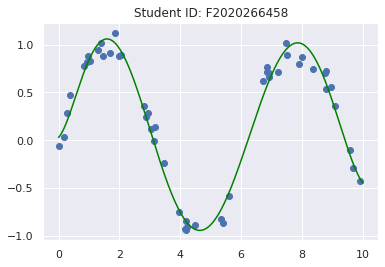

In [82]:
#Basic Linear Regression - Polynimial Basis Function
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.title("Student ID: F2020266458")
plt.scatter(x, y)
plt.plot(xfit, yfit, color="green");


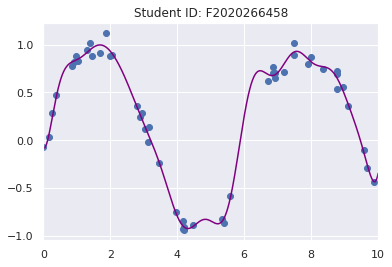

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin):
 """Uniformly spaced Gaussian features for one-dimensional input"""
 def __init__(self, N, width_factor=2.0):
  self.N = N
  self.width_factor = width_factor
 @staticmethod
 def _gauss_basis(x, y, width, axis=None):
  arg = (x - y) / width
  return np.exp(-0.5 * np.sum(arg ** 2, axis))
 def fit(self, X, y=None):
# create N centers spread along the data range
  self.centers_ = np.linspace(X.min(), X.max(), self.N)
  self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
  return self
 def transform(self, X):
   return self._gauss_basis(X[:, :, np.newaxis], self.centers_,self.width_, axis=1)
gauss_model = make_pipeline(GaussianFeatures(20),
LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.title("Student ID: F2020266458")
plt.scatter(x, y)
plt.plot(xfit, yfit, color='purple')
plt.xlim(0, 10);

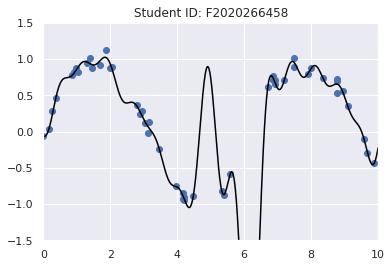

In [84]:
#Regularization
model = make_pipeline(GaussianFeatures(30),
LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]), color="black")
plt.title("Student ID: F2020266458")
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

Text(0.5, 1.0, 'Student ID: F2020266458')

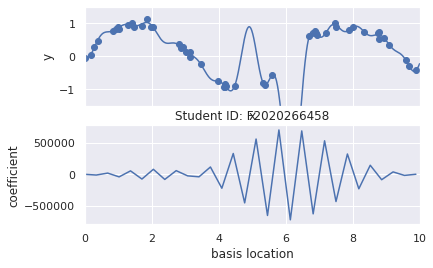

In [85]:
def basis_plot(model, title=None):
  fig, ax = plt.subplots(2, sharex=True)
  model.fit(x[:, np.newaxis], y)
  ax[0].scatter(x, y)
  ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
  ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
  if title:
    ax[0].set_title(title)
  ax[1].plot(model.steps[0][1].centers_,
  model.steps[1][1].coef_)
  ax[1].set(xlabel='basis location',
  ylabel='coefficient',
  xlim=(0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)
plt.title("Student ID: F2020266458")


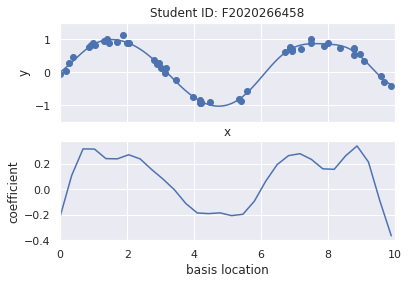

In [86]:
#Ridge Regression (L2 Regularization)
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Student ID: F2020266458')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


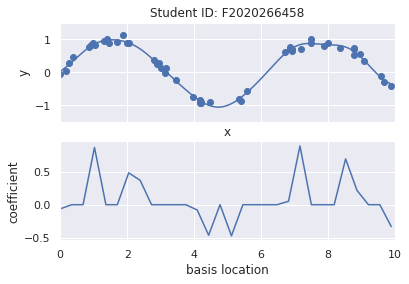

In [87]:
#Lasso Regularization (L1)
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Student ID: F2020266458')

In [101]:
#Predicting Bicycle Traffic
import pandas as pd
counts = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)


In [102]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]

In [103]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)


In [104]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

<ipython-input-116-9560003ad458>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


Text(0.5, 1.0, 'Student ID: F2020266458')

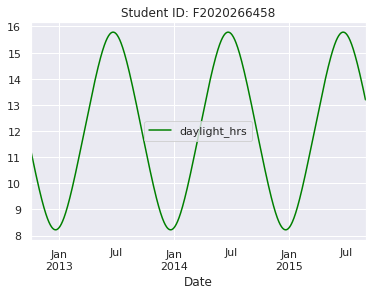

In [116]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
  days = (date - pd.datetime(2000, 12, 21)).days
  m = (1. - np.tan(np.radians(latitude))
  * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
  return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot(color='green');
plt.title("Student ID: F2020266458")

In [106]:
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [107]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [108]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [114]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday','daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

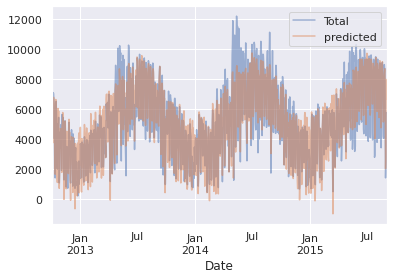

In [115]:
daily[['Total', 'predicted']].plot(alpha=0.5);